In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite://///Users/jessmroczek/Documents/DA_Bootcamp/Homework Files/HW_Repositories/sqlalchemy-challenge/Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect= True)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector=inspect(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

In [11]:
# Find the most recent date recorded
recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [12]:
#Convert recent date to date in df
latest_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
print(latest_date)

2017-08-23 00:00:00


In [13]:
# Calculate the date one year from the last date in data set.
one_year_back = latest_date - dt.timedelta(days = 365)
print(one_year_back)

2016-08-23 00:00:00


In [14]:
# Perform a query to retrieve the data and precipitation scores
data = [Measurement.date,
        func.sum(Measurement.prcp)]
precipitation = session.query(*data).\
        filter(func.strftime(Measurement.date) >= one_year_back).\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

In [15]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns = ['date', 'total_precipitation'])
#print(precipitation_df)
precipitation_df.dropna()
# Sort the dataframe by date
precipitation_df.sort_values(by='date')
precipitation_df.set_index('date', inplace=True)
precipitation_df


,total_precipitation
date,
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
2016-08-28,3.10
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


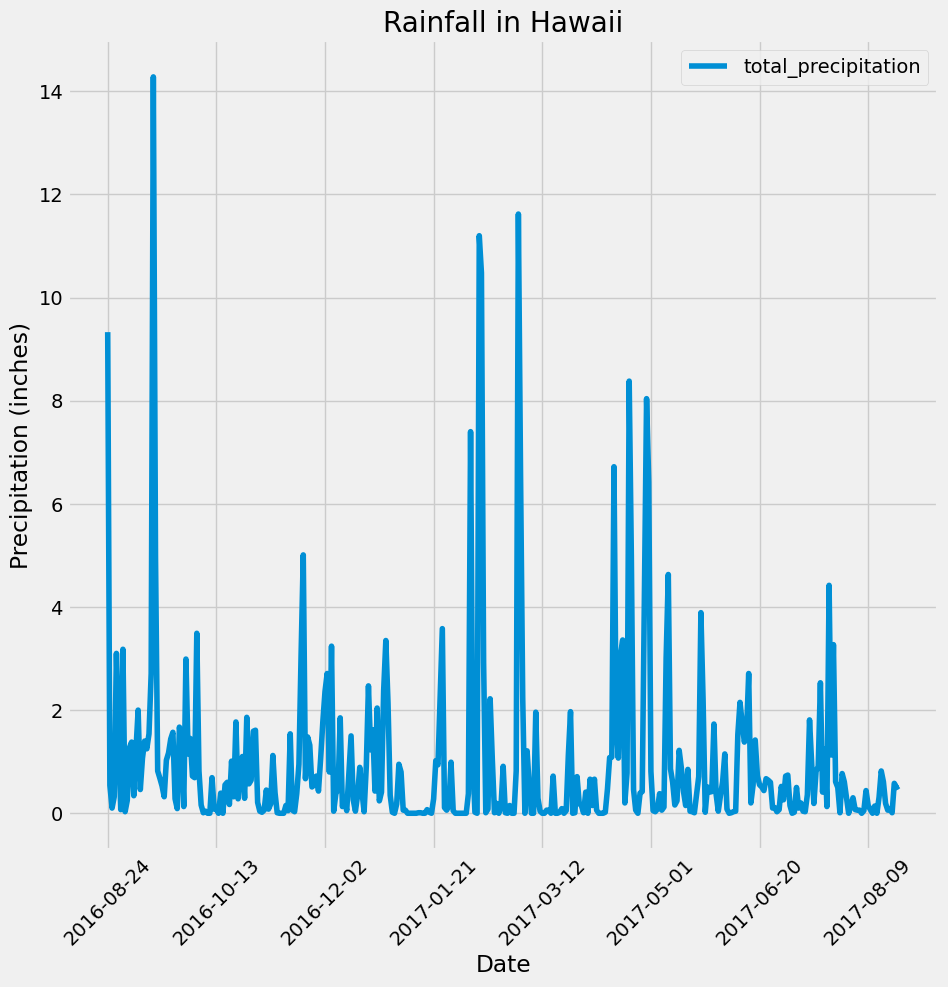

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=45, title = "Rainfall in Hawaii", xlabel='Date', ylabel = "Precipitation (inches)", figsize=(10,10))
plt.show()


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,total_precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
total_count = session.query(Measurement.station).distinct().count()
print(total_count)

9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
mas = [Measurement.station,
        func.count(Measurement.date)]
station_activity = session.query(*mas).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs = [Measurement.station,
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]
active_station = session.query(*tobs).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)
for station in active_station:
     print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = [Measurement.date,
       Measurement.tobs]
station_obs = session.query(*tobs).\
        filter(func.strftime(Measurement.date) >= one_year_back, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
station_obs

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [22]:
#Create Dateframe of the data
station_obs_df = pd.DataFrame(station_obs, columns = ['Date', 'Temperature'])
#print(station_obs_df)
station_obs_df.dropna()
# Sort the dataframe by date
station_obs_df.sort_values(by='Date')
station_obs_df.set_index('Date', inplace=True)
station_obs_df

,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


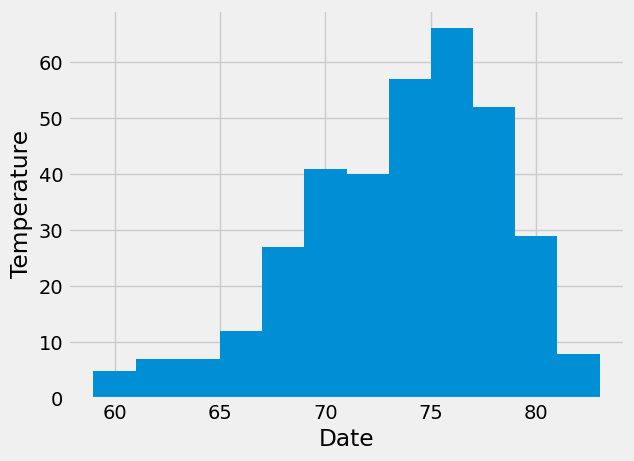

In [23]:
# Create Histogram 
plt.hist(station_obs_df['Temperature'],bins=12, label="TOBS")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

# Close Session

In [24]:
# Close Session
session.close()